In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df0 = pd.read_pickle("GBT_57532_09539_HIP56445_fine/info.pkl")
df0 = df0.set_index("index")
df0

,statistic,pvalue,freqs
index,,,
289301080,6219.655813,0.000000e+00,1105.955330
289301180,6234.612421,0.000000e+00,1105.955046
289302380,301.247182,3.845966e-66,1105.951644
289302480,295.603308,6.464831e-65,1105.951360
289460580,1892.986158,0.000000e+00,1105.503067
...,...,...,...
172513356,273.589265,3.898037e-60,1437.107321
172641072,925.144163,1.280848e-201,1436.745181
172641172,901.779106,1.517593e-196,1436.744898


In [4]:
df = pd.read_pickle("info_all.pkl")
df = df.set_index("index")
df

,statistic,pvalue,block_num,freqs
index,,,,
144650240,23.706093,7.116842e-06,10,1516.113281
144650340,16.291228,2.900046e-04,10,1516.112998
144650440,19.844449,4.907188e-05,10,1516.112714
144650540,32.538668,8.596429e-08,10,1516.112431
144650640,55.228122,1.017105e-12,10,1516.112147
...,...,...,...,...
57859580,26.128031,2.120168e-06,3,1762.208494
57859680,20.256921,3.992690e-05,3,1762.208211
57859780,33.136980,6.373767e-08,3,1762.207927


In [5]:
df0.sort_index()
df.sort_index()

,statistic,pvalue,block_num,freqs
index,,,,
0,1458.939302,0.000000e+00,0,1926.269531
100,1164.556241,1.317726e-253,0,1926.269248
200,1242.913410,1.272865e-270,0,1926.268964
300,1533.651612,0.000000e+00,0,1926.268681
400,1585.480041,0.000000e+00,0,1926.268397
...,...,...,...,...
318230012,24.068235,5.938123e-06,21,1023.927244
318230112,20.517493,3.504959e-05,21,1023.926961
318230212,25.032166,3.667197e-06,21,1023.926677


In [6]:
df.describe()

,statistic,pvalue,block_num,freqs
count,3.182256e+06,3.182256e+06,3.182256e+06,3.182256e+06
mean,2.177388e+02,1.382241e-03,1.050000e+01,1.475098e+03
std,8.034907e+02,1.293470e-02,6.344290e+00,2.604842e+02
min,3.119978e-03,0.000000e+00,0.000000e+00,1.023926e+03
25%,1.971069e+01,5.846351e-10,5.000000e+00,1.249512e+03
50%,2.813181e+01,7.784932e-07,1.050000e+01,1.475098e+03
75%,4.252007e+01,5.246614e-05,1.600000e+01,1.700684e+03
max,1.049079e+04,9.984412e-01,2.100000e+01,1.926270e+03


In [7]:
filtered_freqs = df["freqs"]
p_vals = df["pvalue"]
stats = df["statistic"]

In [ ]:
num_bins = int(1000000//(1926.269531 - 1025.390648))
plt.figure()
plt.title(f"Histogram of Hits (bin size = {(1926.269531 - 1025.390648) / num_bins} MHz)")
plt.ylabel("number of hits")
plt.xlabel("frequency [MHz]")
n, bins, patches = plt.hist(filtered_freqs, bins=num_bins)

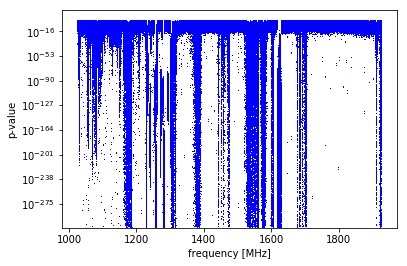

In [8]:
plt.figure()
plt.yscale("log")
plt.ylabel("p-value")
plt.xlabel("frequency [MHz]")
plt.plot(filtered_freqs, p_vals,'b,')

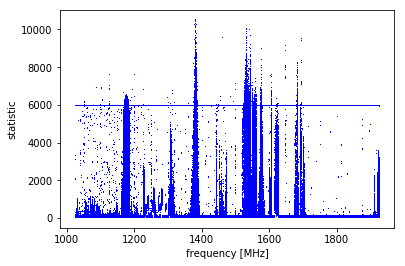

In [9]:
plt.figure()
plt.ylabel("statistic")
plt.xlabel("frequency [MHz]")
plt.plot(filtered_freqs, stats,'b,')

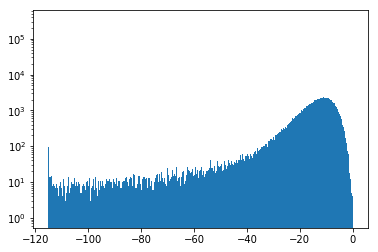

In [14]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(np.log(p_vals+1e-50), bins=10000)

In [ ]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(stats, bins=10000)

In [44]:
df0.sort_values("pvalue").iloc[347723//2]

statistic     8.635740e+02
pvalue       3.001089e-188
freqs         1.183392e+03
Name: 261991248, dtype: float64

In [45]:
a = np.load("136007196.npy")
b = np.load("261625748.npy")
c = np.load("261991248.npy")

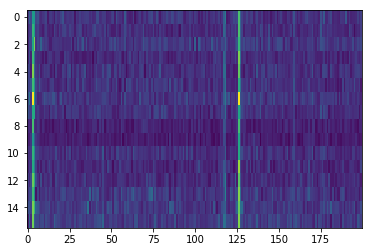

In [46]:
plt.imshow(a, aspect="auto")

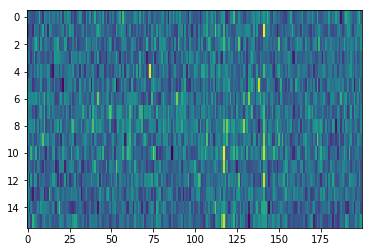

In [47]:
plt.imshow(b, aspect="auto")

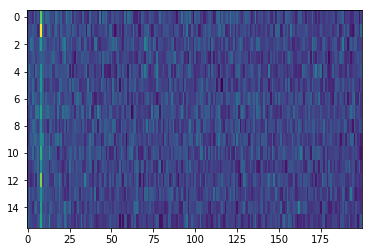

In [48]:
plt.imshow(c, aspect="auto")